<a href="https://colab.research.google.com/github/claradilara/DataScienceProject1/blob/main/Britis%20Airlane%20Passenger%20Rewiev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

# Dosya yolunuza göre uygun şekilde güncelleyin
dosya_yolu = '/content/British_Airway_Review.csv'

# CSV dosyasını oku
veri_cercevesi = pd.read_csv(dosya_yolu)

# Verileri ekrana yazdır
print(veri_cercevesi)


                                                reviews                date  \
0     ✅ Trip Verified |  I had the most fantastic BA...     1st August 2023   
1     ✅ Trip Verified |  Couldn’t book in online. Ar...      31st July 2023   
2     ✅ Trip Verified | London Heathrow to Mumbai in...      31st July 2023   
3     ✅ Trip Verified | Keflavík, Iceland to London ...      31st July 2023   
4     ✅ Trip Verified | Terrible Experience with Bri...      29th July 2023   
...                                                 ...                 ...   
2495  Roundtrip with British Airways from Bangkok to...  12th November 2015   
2496  Awful customer service. My wife and I have flo...  11th November 2015   
2497  I travelled from London to Sydney via Singapor...  10th November 2015   
2498  British Airways have just moved Cape Town flig...  10th November 2015   
2499  Bengaluru to Heathrow. My first long haul flig...  10th November 2015   

             country       seat_type recommended  s

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


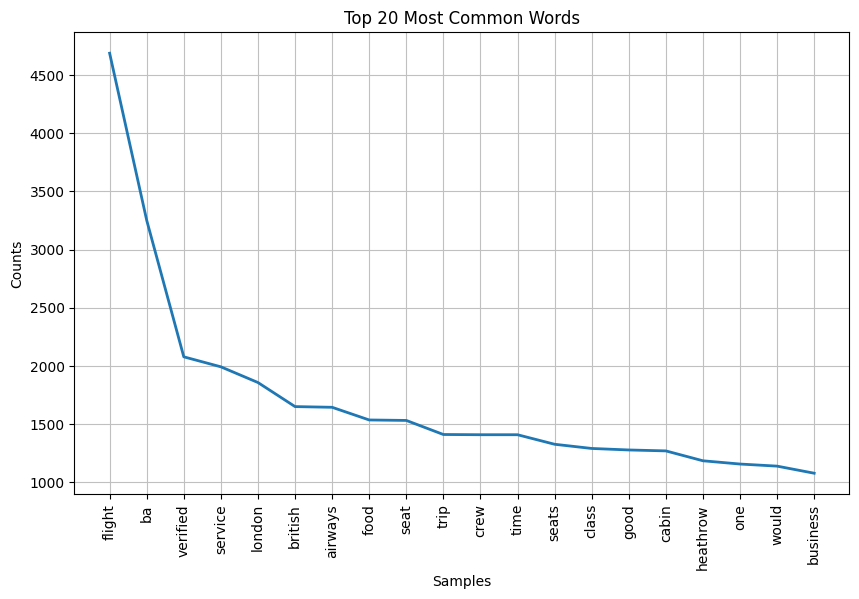

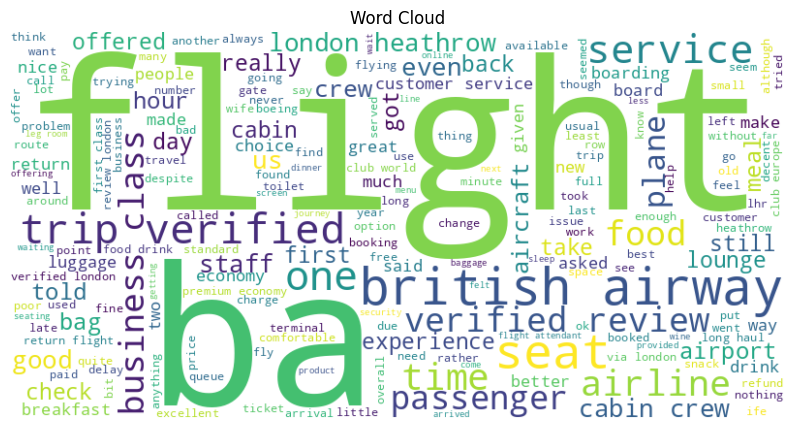

In [26]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_path = '/content/British_Airway_Review.csv'  # Update with your dataset file path
veri_cercevesi = pd.read_csv(file_path)

# Data cleaning and preprocessing
nltk.download('punkt')  # Download NLTK resources (if not downloaded)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))  # Define stopwords

# Text preprocessing function
def preprocess_text(text):
    words = word_tokenize(str(text).lower())  # Tokenize text and convert to lowercase
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic characters
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Apply preprocessing function to your text data column

# Assuming the review text is in a column named 'review_text'
veri_cercevesi['clean_text'] = veri_cercevesi['reviews'].apply(preprocess_text)

# Rest of the analysis code...

# Basic analysis - Frequency Distribution
all_words = [word for sublist in veri_cercevesi['clean_text'] for word in sublist]
freq_dist = FreqDist(all_words)

# Plotting word frequency
plt.figure(figsize=(10, 6))
freq_dist.plot(20, title='Top 20 Most Common Words')
plt.show()

# Generating Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [29]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

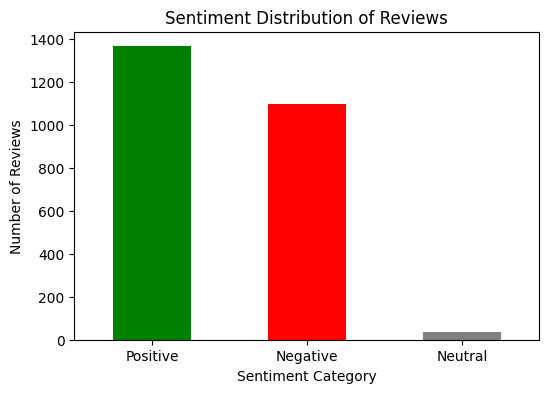

Positive    1366
Negative    1098
Neutral       36
Name: sentiment_category, dtype: int64


In [30]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming 'veri_cercevesi' contains your dataset with review text
# Replace 'review_text' with the column name containing the review text in your dataset

# Create a new column for sentiment scores
veri_cercevesi['sentiment'] = veri_cercevesi['reviews'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

# Define function to categorize sentiment scores
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization to create a new column
veri_cercevesi['sentiment_category'] = veri_cercevesi['sentiment'].apply(categorize_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts = veri_cercevesi['sentiment_category'].value_counts()

# Plotting sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Print the count of each sentiment category
print(sentiment_counts)


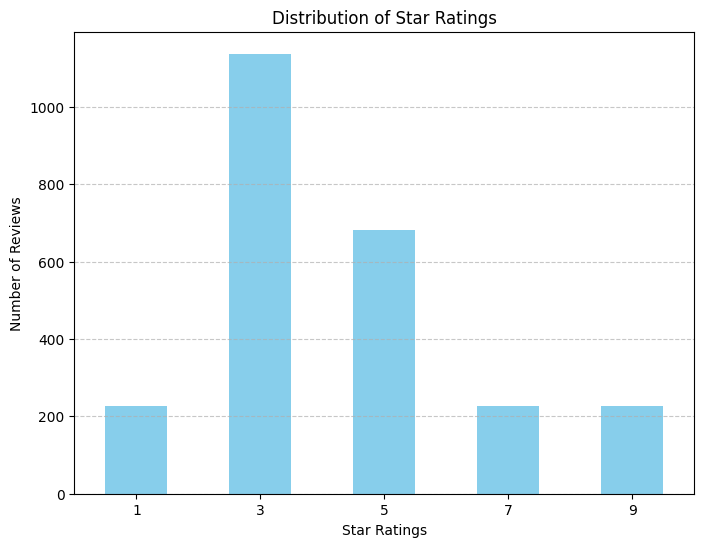

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'veri_cercevesi' contains your dataset and 'stars' column represents star ratings

# Count the occurrences of each star rating
star_counts = veri_cercevesi['stars'].value_counts().sort_index()

# Plotting the distribution of star ratings
plt.figure(figsize=(8, 6))
star_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


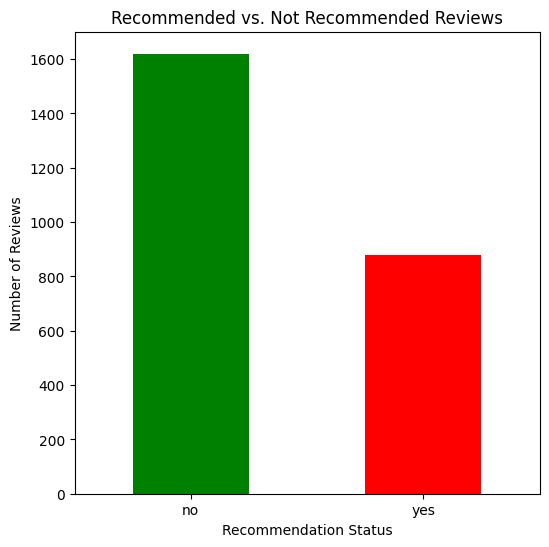

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'veri_cercevesi' contains your dataset and 'recommended' column represents recommendation status

# Count the occurrences of 'yes' (recommended) and 'no' (not recommended) reviews
recommendation_counts = veri_cercevesi['recommended'].value_counts()

# Plotting the count of recommended vs. not recommended reviews using a bar chart
plt.figure(figsize=(6, 6))
recommendation_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Recommended vs. Not Recommended Reviews')
plt.xlabel('Recommendation Status')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


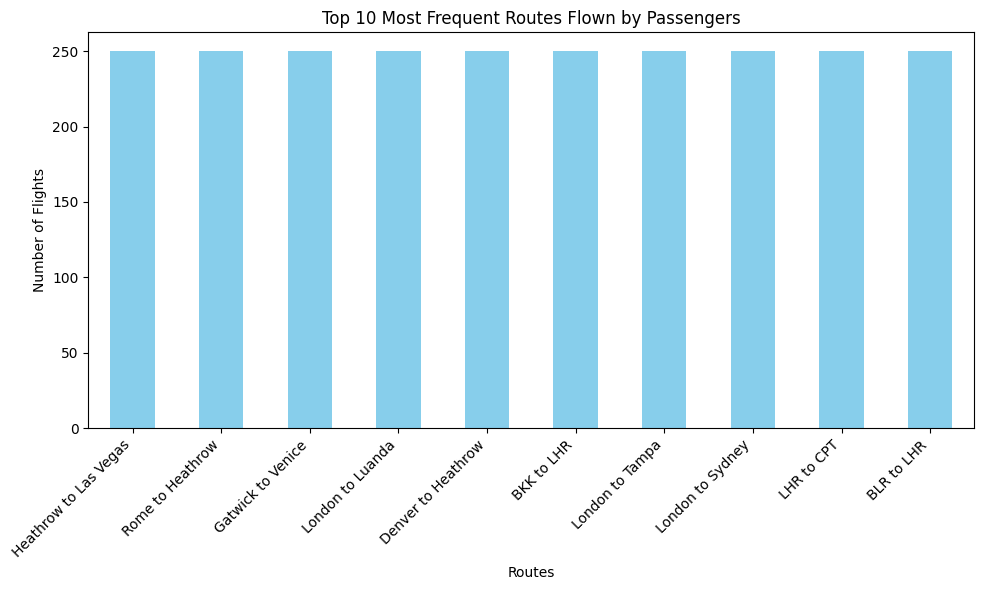

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'veri_cercevesi' contains your dataset and 'route' column represents flight routes

# Count the occurrences of each route
route_counts = veri_cercevesi['route'].value_counts().head(10)  # Consider top 10 routes

# Plotting the most frequent routes flown by passengers using a bar chart
plt.figure(figsize=(10, 6))
route_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Routes Flown by Passengers')
plt.xlabel('Routes')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


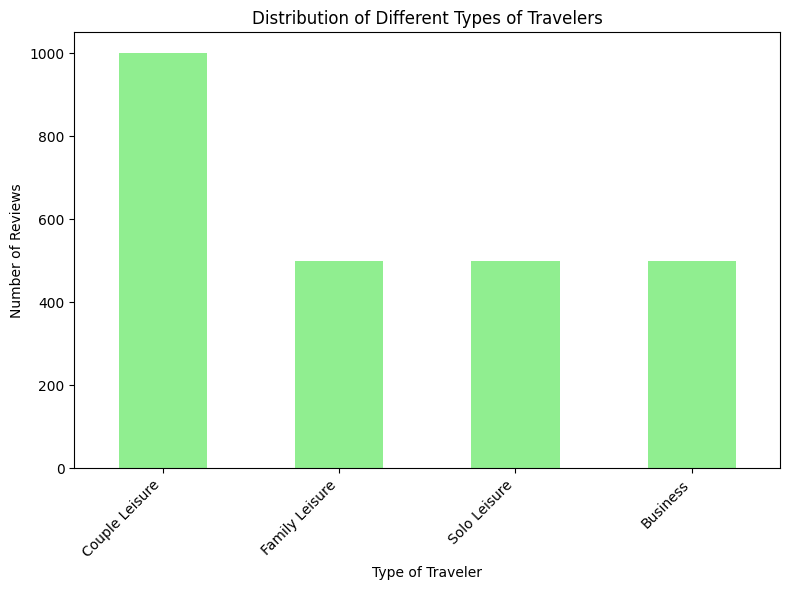

In [38]:
# Assuming 'type_of_traveller' column represents the type of traveler

# Count the occurrences of each type of traveler
traveler_counts = veri_cercevesi['type_of_traveller'].value_counts()

# Plotting the distribution of different types of travelers using a bar chart
plt.figure(figsize=(8, 6))
traveler_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Different Types of Travelers')
plt.xlabel('Type of Traveler')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
# Number of reviews analyzed
total_reviews = len(veri_cercevesi)

# Example metrics - You can customize these based on your analysis
top_positive_sentiments = veri_cercevesi[veri_cercevesi['sentiment'] > 0.5]['reviews'].head(5)
top_negative_sentiments = veri_cercevesi[veri_cercevesi['sentiment'] < -0.5]['reviews'].head(5)
common_words = veri_cercevesi['reviews'].str.split(expand=True).stack().value_counts().head(10)

print(f"Number of Reviews Analyzed: {total_reviews}")
print("\nTop 5 Positive Sentiments:")
print(top_positive_sentiments)
print("\nTop 5 Negative Sentiments:")
print(top_negative_sentiments)
print("\nTop 10 Most Commonly Used Words:")
print(common_words)


Number of Reviews Analyzed: 2500

Top 5 Positive Sentiments:
0     ✅ Trip Verified |  I had the most fantastic BA...
1     ✅ Trip Verified |  Couldn’t book in online. Ar...
2     ✅ Trip Verified | London Heathrow to Mumbai in...
11    Not Verified |  Fast and friendly check in (to...
12    ✅ Trip Verified |  I don't understand why Brit...
Name: reviews, dtype: object

Top 5 Negative Sentiments:
5     ✅ Trip Verified | An airline that lives in the...
7     ✅ Trip Verified | I chose British Airways espe...
8     Not Verified | I booked Premium Economy from I...
14    ✅ Trip Verified |  Customer Service does not e...
16    Not Verified |  Our A380 developed a fault tax...
Name: reviews, dtype: object

Top 10 Most Commonly Used Words:
the    17503
to     14221
and    12503
a       9192
was     8894
I       7812
of      5910
in      5322
on      4787
for     4413
dtype: int64
